<a href="https://colab.research.google.com/github/MariamMoawed/CodeAlpha/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install yfinance


In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
stock_symbol = 'AAPL'
stock_data = yf.Ticker(stock_symbol)

# Get historical market data
historical_data = stock_data.history(period='max')


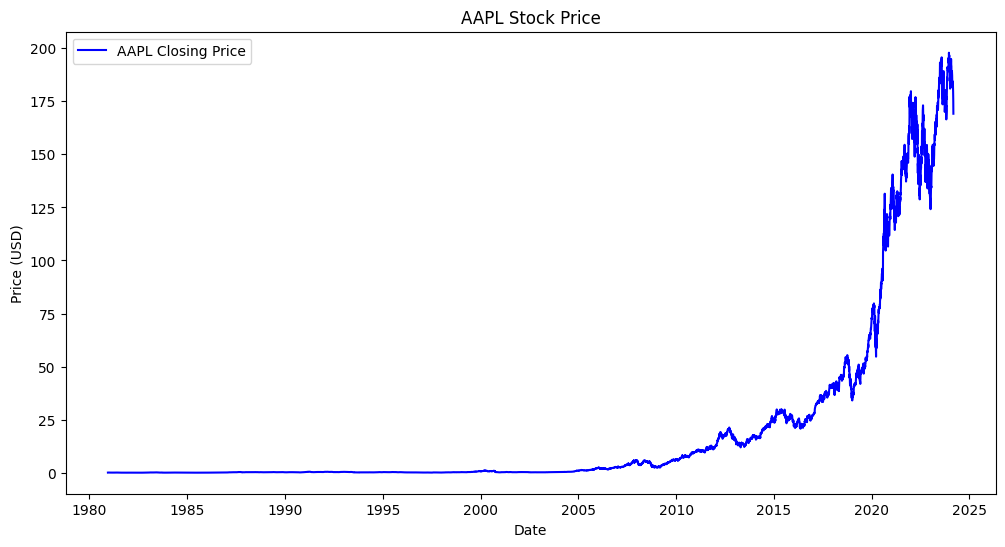

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(historical_data['Close'], label=f'{stock_symbol} Closing Price', color='b')
plt.title(f'{stock_symbol} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


# **By using LSTM we will predict the Stock of Yahoo finance**

Epoch 1/10
271/271 [==============================] - 7s 8ms/step - loss: 2.0213e-05
Epoch 2/10
271/271 [==============================] - 2s 8ms/step - loss: 3.0264e-06
Epoch 3/10
271/271 [==============================] - 2s 8ms/step - loss: 2.5487e-06
Epoch 4/10
271/271 [==============================] - 2s 9ms/step - loss: 2.5644e-06
Epoch 5/10
271/271 [==============================] - 3s 10ms/step - loss: 2.0937e-06
Epoch 6/10
271/271 [==============================] - 2s 8ms/step - loss: 1.8389e-06
Epoch 7/10
271/271 [==============================] - 2s 8ms/step - loss: 1.9288e-06
Epoch 8/10
271/271 [==============================] - 2s 8ms/step - loss: 1.6264e-06
Epoch 9/10
271/271 [==============================] - 2s 8ms/step - loss: 1.7773e-06
Epoch 10/10
67/67 [==============================] - 1s 4ms/step


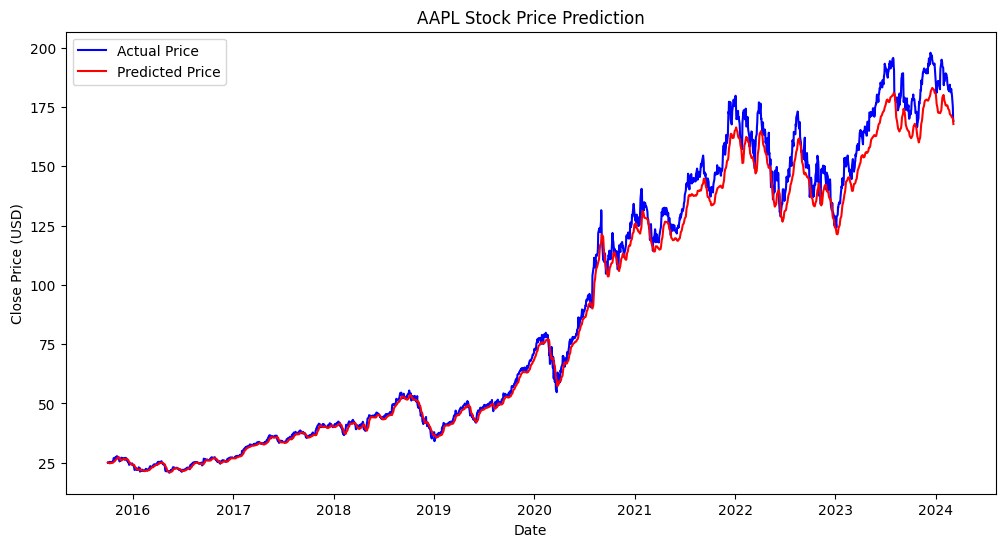

In [15]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Retrieve historical stock data
stock_symbol = 'AAPL'
stock_data = yf.Ticker(stock_symbol)
historical_data = stock_data.history(period='max')

# Extract closing prices and normalize the data
close_prices = historical_data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_prices)

# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Prepare input sequences and target labels
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Adjust as needed
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Build the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)),
    tf.keras.layers.LSTM(units=50, return_sequences=False),
    tf.keras.layers.Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(historical_data.index[train_size+seq_length:], close_prices[train_size+seq_length:], label='Actual Price', color='b')
plt.plot(historical_data.index[train_size+seq_length:], predicted_prices, label='Predicted Price', color='r')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()
